In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
pd_ndvi = pd.read_csv('ndvi.csv')
pd_fpar = pd.read_csv('mod15_par.csv')

# Merge the two dataframes
merged_df = pd.merge(pd_ndvi, pd_fpar, on=['name', 'year', 'month'])

# Create a new column for the date in the format mm/yyyy
merged_df['date'] = merged_df['month'].astype(str).str.zfill(2) + '/' + merged_df['year'].astype(str)

merged_df

,name,year,month,ndvi,fpar,date
0,Sundarbans,2014,1,0.636637,0.687500,01/2014
1,Sundarbans,2014,2,0.626880,0.630000,02/2014
2,Sundarbans,2014,3,0.591690,0.583750,03/2014
3,Sundarbans,2014,4,0.532939,0.493333,04/2014
4,Sundarbans,2014,5,0.380706,0.383349,05/2014
...,...,...,...,...,...,...
283,Can Gio,2019,8,0.520201,0.622767,08/2019
284,Can Gio,2019,9,0.534958,0.582941,09/2019
285,Can Gio,2019,10,0.684051,0.863313,10/2019
286,Can Gio,2019,11,0.659408,0.782708,11/2019


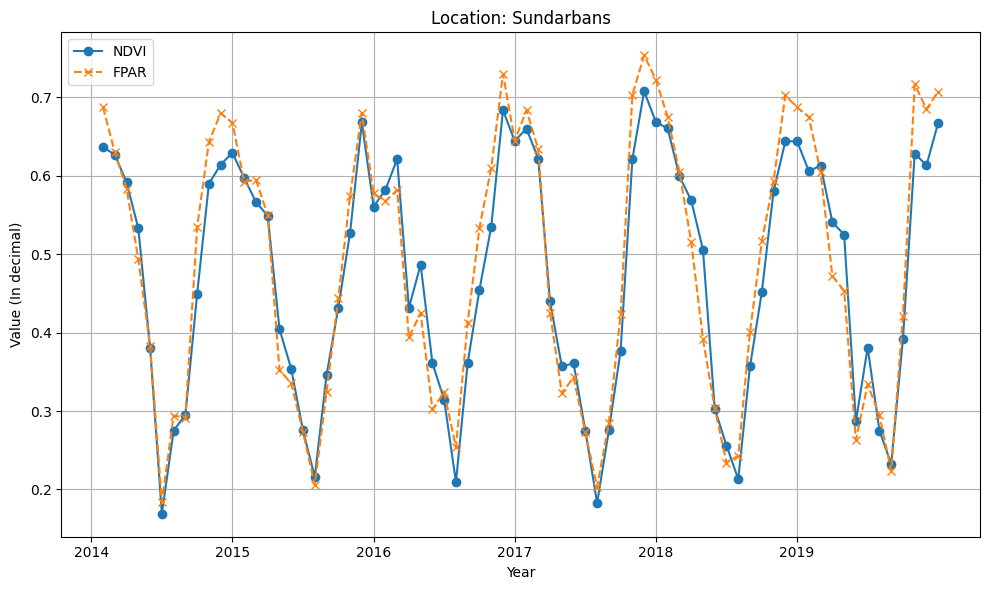

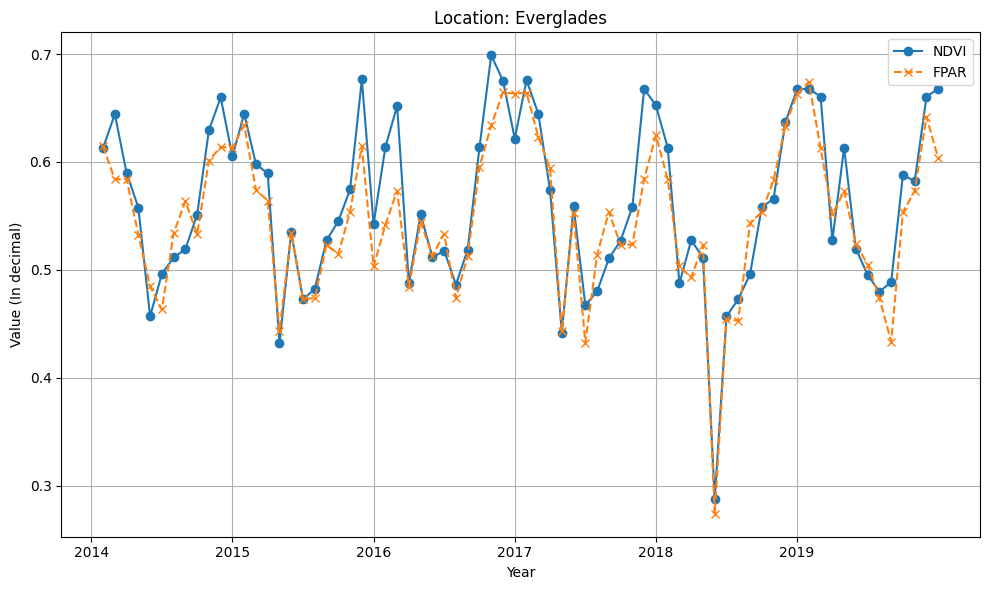

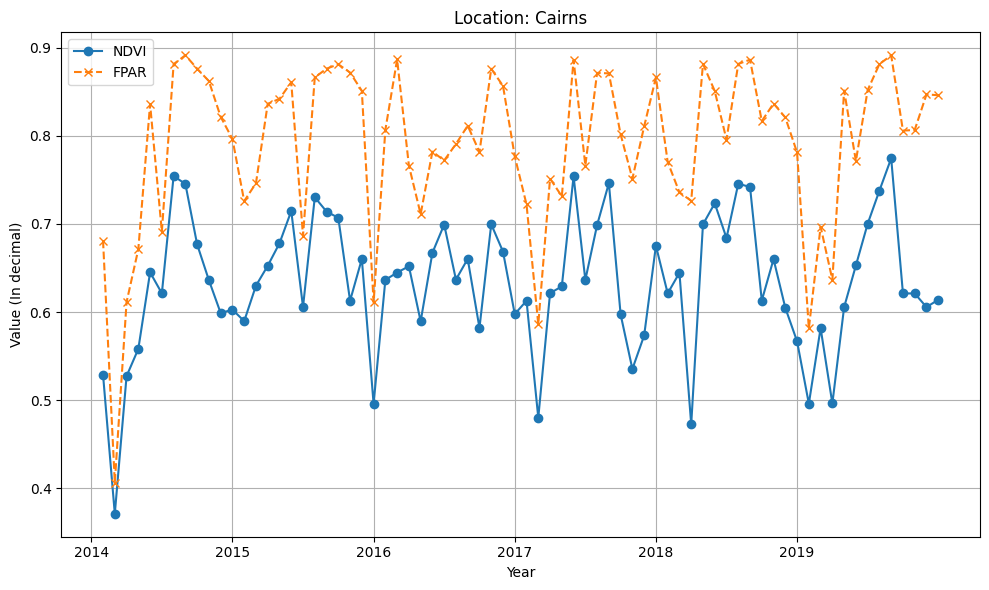

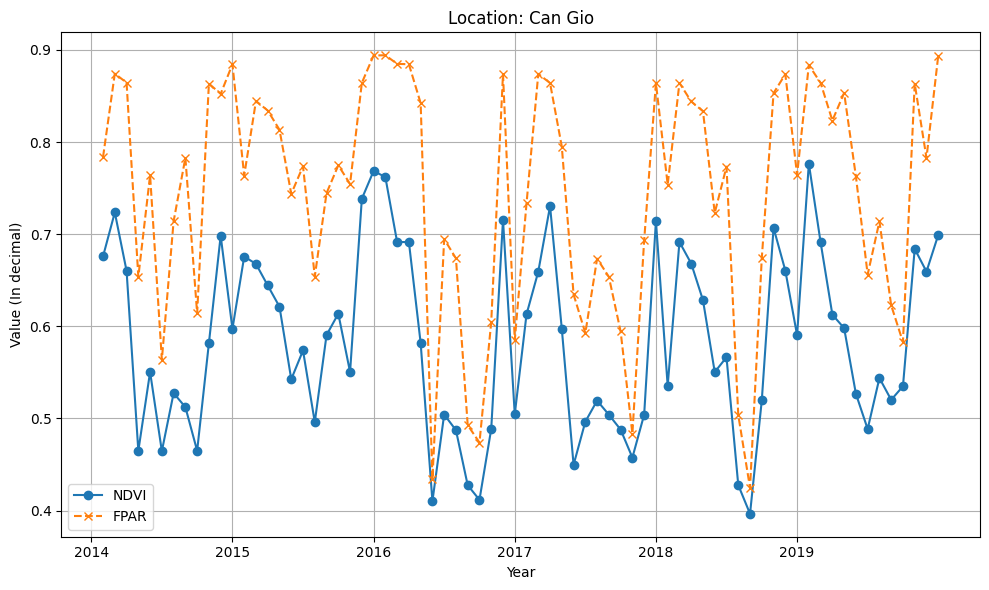

In [14]:
locations = merged_df['name'].unique()

for location in locations:
    subset = merged_df[merged_df['name'] == location]
    
    plt.figure(figsize=(10, 6))
    plt.plot(subset['year'] + subset['month'] / 12, subset['ndvi'], label='NDVI', marker='o')
    plt.plot(subset['year'] + subset['month'] / 12, subset['fpar'], label='FPAR', linestyle='--', marker='x')
    plt.title(f'Location: {location}')
    plt.xlabel('Year')
    plt.ylabel('Value (In decimal)')
    plt.legend()
    plt.grid(True)
    plt.xticks(subset['year'].unique())  # This ensures only unique years are shown
    plt.tight_layout()
    plt.show()
